## Artificial Intelligence in Decision Making and Control of Industrial Applications [2023-24]
Assignment 3: Sequence Modelling (LSTM)
Author: Matteo Mascheroni

### Acknowledgement and disclaimer
https://medium.com/@anishnama20/understanding-gated-recurrent-unit-gru-in-deep-learning-2e54923f3e2
http://colah.github.io/posts/2015-08-Understanding-LSTMs/
https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be
https://arxiv.org/pdf/1406.1078v3.pdf
Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition, Aurélien Géron

In the following section the main steps and models explored for this work are presented, thus resulting in a high number of outputs. A summary of the process and the main steps followd is presented in the [conclusion](#Conclusion).

In [116]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns

### Importing data

In [92]:
import os
file_list = os.listdir('./training_data_new')

Files are shuffled when imported

In [93]:
import random
random.shuffle(file_list)
file_list

['14761.csv',
 '13916.csv',
 '15375.csv',
 '10427.csv',
 '17516.csv',
 '15684.csv',
 '12613.csv',
 '12521.csv',
 '11594.csv',
 '16651.csv',
 '12494.csv',
 '17607.csv',
 '16602.csv',
 '15578.csv',
 '1720.csv',
 '15980.csv',
 '11917.csv',
 '10267.csv',
 '15457.csv',
 '14350.csv',
 '12394.csv',
 '16779.csv',
 '16529.csv',
 '17180.csv',
 '16340.csv',
 '11032.csv',
 '18186.csv',
 '17888.csv',
 '18289.csv',
 '18040.csv',
 '11211.csv',
 '14057.csv',
 '10823.csv',
 '15848.csv',
 '14685.csv',
 '18231.csv',
 '12900.csv',
 '13162.csv',
 '13894.csv',
 '18319.csv',
 '18028.csv',
 '14892.csv',
 '11430.csv',
 '17633.csv',
 '16711.csv',
 '10184.csv',
 '12628.csv',
 '16107.csv',
 '17657.csv',
 '16417.csv',
 '14245.csv',
 '14486.csv',
 '12045.csv',
 '10771.csv',
 '15755.csv',
 '11195.csv',
 '11005.csv',
 '12419.csv',
 '12358.csv',
 '15629.csv',
 '13457.csv',
 '12069.csv',
 '10043.csv',
 '13972.csv',
 '15393.csv',
 '14481.csv',
 '11678.csv',
 '14386.csv',
 '11097.csv',
 '17362.csv',
 '15089.csv',
 '13280

In [94]:
len(file_list)

9400

### Dataset description
The dataset consist of 9400 files (not 18457) each containing data for 12 variables observed over 67 times.
The variables include:
- Local_X: x coordinate
- Local_Y: y coordinate
- v_Vel: velocity
- v_Acc: acceleration
- Space_Headway: the free space in front of the vehicle
- dis_cen: distance from centerline
- i_l, i_r,i_f: categorical with value 1 if there is a vehicle on the left, right or in front
- dis_l, dis_r, dist_f: distance from others vehicles, 99.0 if there is no vehicle

In [149]:
file = file_list[0]
data_ex = pd.read_csv("./training_data_new/"+file)
data_ex

,Local_X,Local_Y,v_Vel,v_Acc,Space_Headway,dis_cen,i_l,i_r,i_f,dis_l,dis_r,dis_f
0,30.319,232.078,24.52,0.00,62.15,1.433333,0,0,1,99.0,99.000,62.15
1,30.332,234.529,24.51,0.00,62.43,1.446333,0,0,1,99.0,99.000,62.43
2,30.345,236.981,24.52,0.00,62.71,1.459333,0,0,1,99.0,99.000,62.71
3,30.360,239.432,24.52,-0.04,63.08,1.474333,0,0,1,99.0,99.000,63.08
4,30.373,241.884,24.51,0.03,63.24,1.487333,0,0,1,99.0,99.000,63.24
...,...,...,...,...,...,...,...,...,...,...,...,...
62,27.881,376.047,23.07,-0.39,64.35,1.004667,0,1,1,99.0,10.453,64.35
63,27.889,378.369,22.30,7.40,64.40,0.996667,0,1,1,99.0,10.423,64.40
64,27.894,380.590,23.88,0.76,64.08,0.991667,0,1,1,99.0,10.384,64.08
65,27.899,383.020,24.25,-6.30,63.34,0.986667,0,0,1,99.0,99.000,63.34


In [279]:
data_ex["Step"] = np.arange(0, len(data_ex))

C:\Users\masch\.conda\envs\assignment_3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\masch\.conda\envs\assignment_3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Step', ylabel='Local_X'>

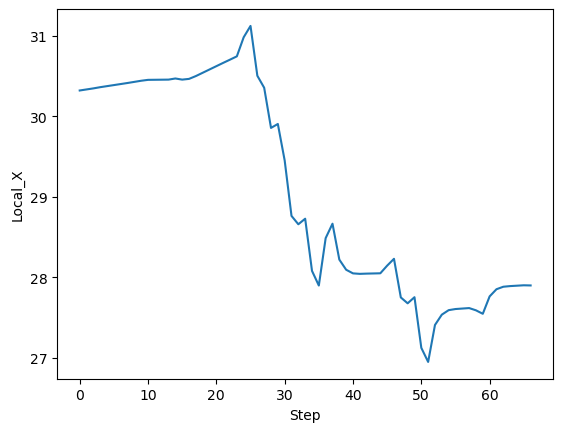

In [280]:
sns.lineplot(data=data_ex, x='Step', y='Local_X')

C:\Users\masch\.conda\envs\assignment_3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\masch\.conda\envs\assignment_3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Step', ylabel='Local_Y'>

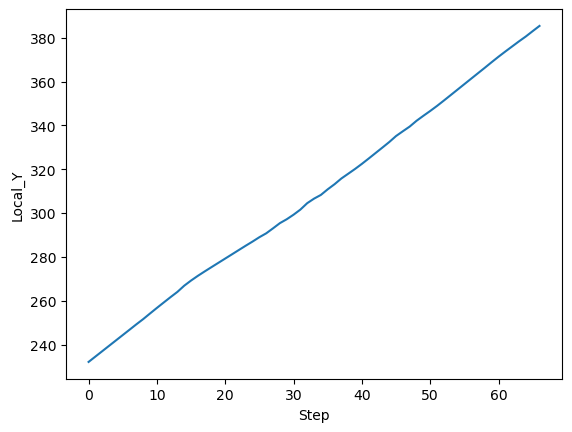

In [152]:
sns.lineplot(data=data_ex, x='Step', y='Local_Y')

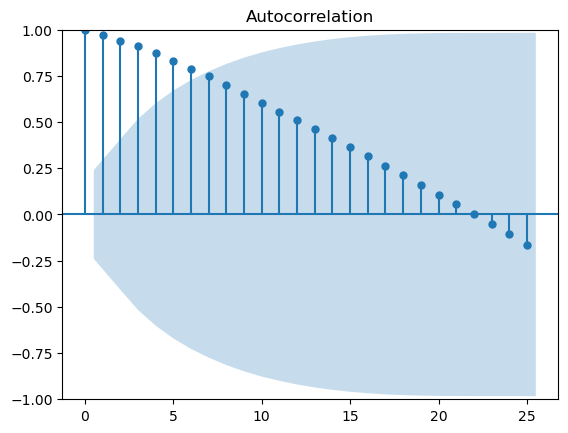

In [153]:
ax = sm.graphics.tsa.plot_acf(data_ex.loc[:,'Local_X'], lags=25)

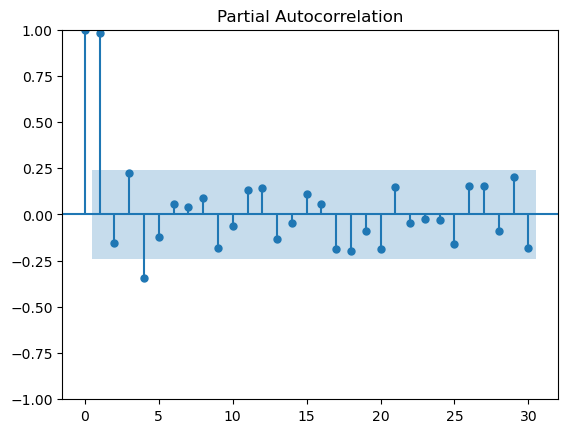

In [154]:
ax = sm.graphics.tsa.plot_pacf(data_ex.loc[:,'Local_X'], lags=30, method="ols")

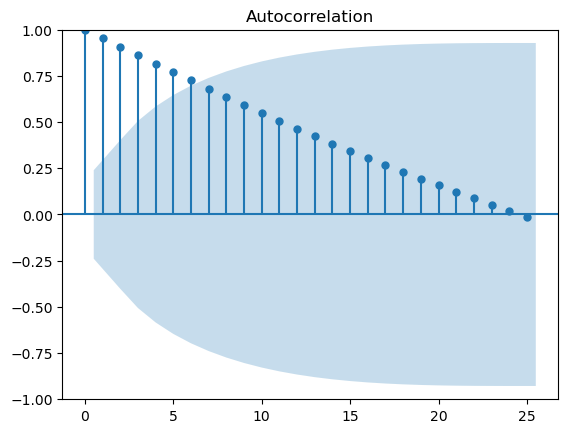

In [157]:
ax = sm.graphics.tsa.plot_acf(data_ex.loc[:,'Local_Y'], lags=25)

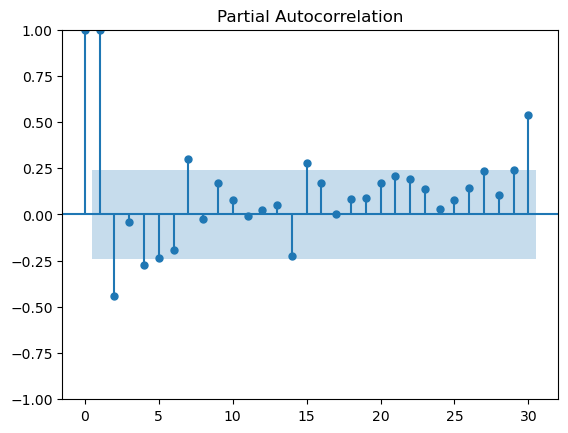

In [155]:
ax = sm.graphics.tsa.plot_pacf(data_ex.loc[:,'Local_Y'], lags=30, method="ols")

Through the analysis of the values of x and y coordinates it seems that the x coordinate is the one with a more variable pattern while the y coordinates seems to be always growing linearly. This suggests that x could represent the distance from one of the two sides of the road while y could represent the dimension parallel to the road (i.e. the distance travelled).

### Train, Validation and Test split
Six functions are created to split the dataset into 3 subsets. The default values for the size of the sets are: 7000 records for training, 1000 records for validation and 1400 for testing.
The first set of 3 functions allows for a creation of a dataset with 1 target variable while a second set of 3 functions allows for the creation a dataset with both x and y as target variables.

In [158]:
def create_dataset_train(list_of_files, time_steps, number_of_variables, prediction_steps , training_size=7000, variable_index = 0):
    X_train, y_train = np.zeros((training_size,time_steps,number_of_variables)), np.zeros((training_size,prediction_steps))
    for i in range(training_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = file.to_numpy()[-prediction_steps:,variable_index]
    return X_train, y_train

In [159]:
def create_dataset_train_xy(list_of_files, time_steps, number_of_variables, prediction_steps , training_size=7000):
    X_train, y_train = np.zeros((training_size,time_steps,number_of_variables)), np.zeros((training_size,prediction_steps*2))
    for i in range(training_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = np.hstack((file.to_numpy()[-prediction_steps:,0], file.to_numpy()[-prediction_steps:,1]))
    return X_train, y_train

In [160]:
def create_dataset_valid(list_of_files, time_steps, number_of_variables, prediction_steps , valid_start=7000, valid_size=1000, variable_index = 0):
    X_train, y_train = np.zeros((valid_size,time_steps,number_of_variables)), np.zeros((valid_size,prediction_steps))
    for i in range(valid_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[valid_start+i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = file.to_numpy()[-prediction_steps:,variable_index]
    return X_train, y_train

In [161]:
def create_dataset_valid_xy(list_of_files, time_steps, number_of_variables, prediction_steps , valid_start=7000, valid_size=1000):
    X_train, y_train = np.zeros((valid_size,time_steps,number_of_variables)), np.zeros((valid_size,prediction_steps*2))
    for i in range(valid_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[valid_start+i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = np.hstack((file.to_numpy()[-prediction_steps:,0], file.to_numpy()[-prediction_steps:,1]))
    return X_train, y_train

In [162]:
def create_dataset_test(list_of_files, time_steps, number_of_variables, prediction_steps , test_start=8000, test_size=1400, variable_index = 0):
    X_train, y_train = np.zeros((test_size,time_steps,number_of_variables)), np.zeros((test_size,prediction_steps))
    for i in range(test_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[test_start+i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = file.to_numpy()[-prediction_steps:,variable_index]
    return X_train, y_train

In [163]:
def create_dataset_test_xy(list_of_files, time_steps, number_of_variables, prediction_steps , test_start=8000, test_size=1400):
    X_train, y_train = np.zeros((test_size,time_steps,number_of_variables)), np.zeros((test_size,prediction_steps*2))
    for i in range(test_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[test_start+i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = np.hstack((file.to_numpy()[-prediction_steps:,0], file.to_numpy()[-prediction_steps:,1]))
    return X_train, y_train

### RMSE
Two other functions are created to compute the total RMSE for comparing the case of using only 1 model to predict both x and y or defining two different models.

In [266]:

def rmse_single_model(model, X_test, y_test):
    xy_hat = model.predict(X_test)
    x_true = y_test[:,:5]
    y_true = y_test[:,5:]
    x_hat = xy_hat[:,:5]
    y_hat = xy_hat[:,5:]
    print(f"root mean squared error x: {mean_squared_error(x_true.flatten(), x_hat.flatten(), squared=False)}")
    print(f"root mean squared error y: {mean_squared_error(y_true.flatten(), y_hat.flatten(), squared=False)}")
    print(f"root mean squared error total: {mean_squared_error(y_test.flatten(), xy_hat.flatten(), squared=False)}")

In [165]:
def rmse_double_model(model_x, model_y, Xx_test, yx_test, Xy_test, yy_test):
    x_hat = model_x.predict(Xx_test)
    y_hat = model_y.predict(Xy_test)
    x_true = yx_test
    y_true = yy_test
    xy_true = np.hstack((yx_test,yy_test))
    xy_test = np.hstack((x_hat,y_hat))
    print(f"root mean squared error x: {mean_squared_error(x_true.flatten(), x_hat.flatten(), squared=False)}")
    print(f"root mean squared error y: {mean_squared_error(y_true.flatten(), y_hat.flatten(), squared=False)}")
    print(f"root mean squared error total: {mean_squared_error(xy_true.flatten(), xy_test.flatten(), squared=False)}")

In [168]:
# variable definition
file = pd.read_csv("./training_data_new/"+file_list[0])
predict_steps = 5
time_steps = file.to_numpy().shape[0] - predict_steps
number_of_variables = file.to_numpy().shape[1]

### Dataset creation
The previously discussed datasets are created:
- 3 dataset for X
- 3 dataset for Y
- 3 dataset for X and Y

In [169]:
X_xtrain, y_xtrain = create_dataset_train(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=0)
X_xvalid, y_xvalid = create_dataset_valid(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=0)
X_xtest, y_xtest = create_dataset_test(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=0)

In [171]:
X_ytrain, y_ytrain = create_dataset_train(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=1)
X_yvalid, y_yvalid = create_dataset_valid(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=1)
X_ytest, y_ytest = create_dataset_test(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=1)

In [170]:
X_xytrain, y_xytrain = create_dataset_train_xy(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps)
X_xyvalid, y_xyvalid = create_dataset_valid_xy(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps)
X_xytest, y_xytest = create_dataset_test_xy(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps)


### Model exploration
The models considered in this analysis are :
- LSTM with 2 layers
- LSTM with 1 layer
- GRU

Every model will be tested predicting X and Y separately and then simultaneously. Then a comparison between models will be carried out looking at the RMSE.
For this step all variables will be considered and no transformation are applied to data.

Epoch 1/25
219/219 [==============================] - 11s 40ms/step - loss: 1259.6077 - mse: 1259.6077 - val_loss: 872.5468 - val_mse: 872.5468
Epoch 2/25
219/219 [==============================] - 8s 37ms/step - loss: 660.7798 - mse: 660.7798 - val_loss: 545.9080 - val_mse: 545.9080
Epoch 3/25
219/219 [==============================] - 8s 37ms/step - loss: 480.8409 - mse: 480.8409 - val_loss: 403.7386 - val_mse: 403.7386
Epoch 4/25
219/219 [==============================] - 8s 37ms/step - loss: 307.7290 - mse: 307.7290 - val_loss: 210.4108 - val_mse: 210.4108
Epoch 5/25
219/219 [==============================] - 8s 37ms/step - loss: 162.6329 - mse: 162.6329 - val_loss: 127.1535 - val_mse: 127.1535
Epoch 6/25
219/219 [==============================] - 8s 37ms/step - loss: 101.7927 - mse: 101.7927 - val_loss: 85.0263 - val_mse: 85.0263
Epoch 7/25
219/219 [==============================] - 8s 37ms/step - loss: 69.6547 - mse: 69.6547 - val_loss: 53.0110 - val_mse: 53.0110
Epoch 8/25
219/2

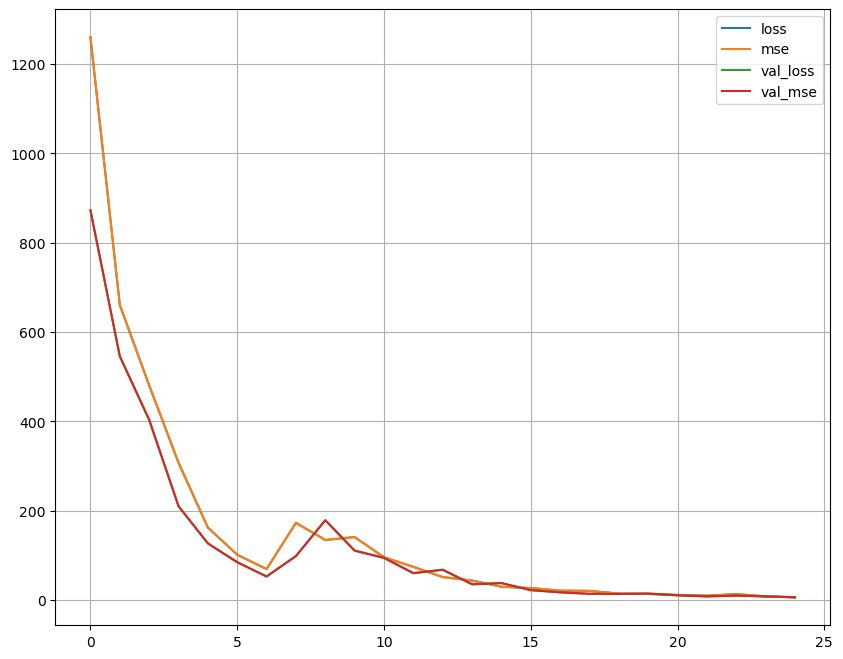

In [174]:
lstm2layers_x = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
lstm2layers_x.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_lstm2layers_x = lstm2layers_x.fit(X_xtrain, y_xtrain, epochs=25, validation_data=(X_xvalid, y_xvalid))
pd.DataFrame(history_lstm2layers_x.history).plot(figsize=(10,8))
plt.grid(True)

Epoch 1/25
219/219 [==============================] - 12s 43ms/step - loss: 962042.8125 - mse: 962042.8125 - val_loss: 926884.1250 - val_mse: 926884.1250
Epoch 2/25
219/219 [==============================] - 9s 40ms/step - loss: 931678.7500 - mse: 931678.7500 - val_loss: 899335.6250 - val_mse: 899335.6250
Epoch 3/25
219/219 [==============================] - 9s 40ms/step - loss: 904422.1250 - mse: 904422.1250 - val_loss: 873014.9375 - val_mse: 873014.9375
Epoch 4/25
219/219 [==============================] - 9s 40ms/step - loss: 878222.9375 - mse: 878222.9375 - val_loss: 847605.3125 - val_mse: 847605.3125
Epoch 5/25
219/219 [==============================] - 9s 40ms/step - loss: 852824.9375 - mse: 852824.9375 - val_loss: 822931.2500 - val_mse: 822931.2500
Epoch 6/25
219/219 [==============================] - 9s 40ms/step - loss: 828149.2500 - mse: 828149.2500 - val_loss: 798967.3125 - val_mse: 798967.3125
Epoch 7/25
219/219 [==============================] - 9s 39ms/step - loss: 804150

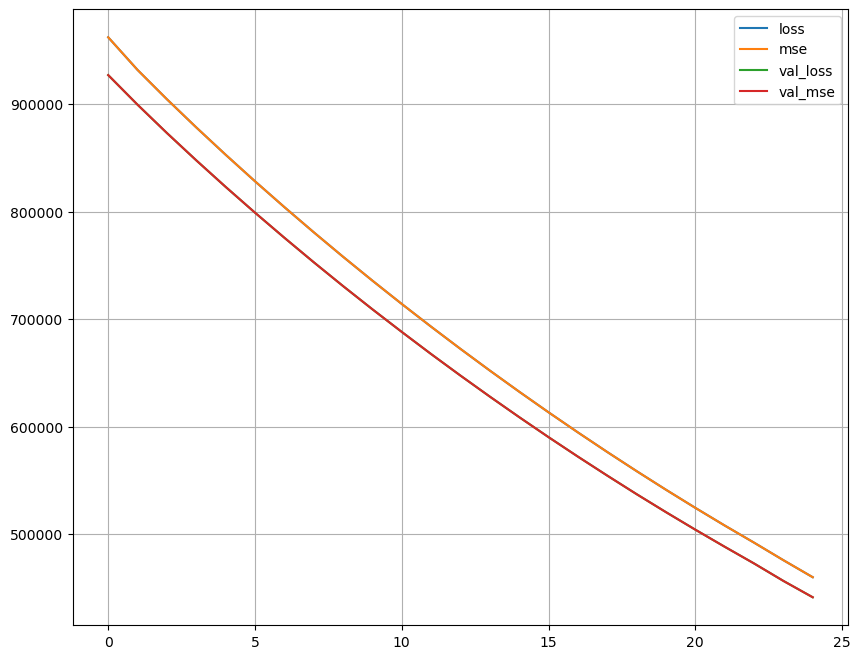

In [175]:
lstm2layers_y = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
lstm2layers_y.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_lstm2layers_y = lstm2layers_y.fit(X_ytrain, y_ytrain, epochs=25, validation_data=(X_yvalid, y_yvalid))
pd.DataFrame(history_lstm2layers_y.history).plot(figsize=(10,8))
plt.grid(True)

Epoch 1/25
219/219 [==============================] - 11s 40ms/step - loss: 480725.3125 - mse: 480725.3125 - val_loss: 463172.9688 - val_mse: 463172.9688
Epoch 2/25
219/219 [==============================] - 8s 37ms/step - loss: 465490.8438 - mse: 465490.8438 - val_loss: 449304.4062 - val_mse: 449304.4062
Epoch 3/25
219/219 [==============================] - 8s 37ms/step - loss: 451833.9062 - mse: 451833.9062 - val_loss: 436155.1250 - val_mse: 436155.1250
Epoch 4/25
219/219 [==============================] - 8s 37ms/step - loss: 438751.8750 - mse: 438751.8750 - val_loss: 423462.3750 - val_mse: 423462.3750
Epoch 5/25
219/219 [==============================] - 8s 37ms/step - loss: 426098.9062 - mse: 426098.9062 - val_loss: 411173.4062 - val_mse: 411173.4062
Epoch 6/25
219/219 [==============================] - 8s 37ms/step - loss: 413805.5938 - mse: 413805.5938 - val_loss: 399225.5312 - val_mse: 399225.5312
Epoch 7/25
219/219 [==============================] - 8s 37ms/step - loss: 401830

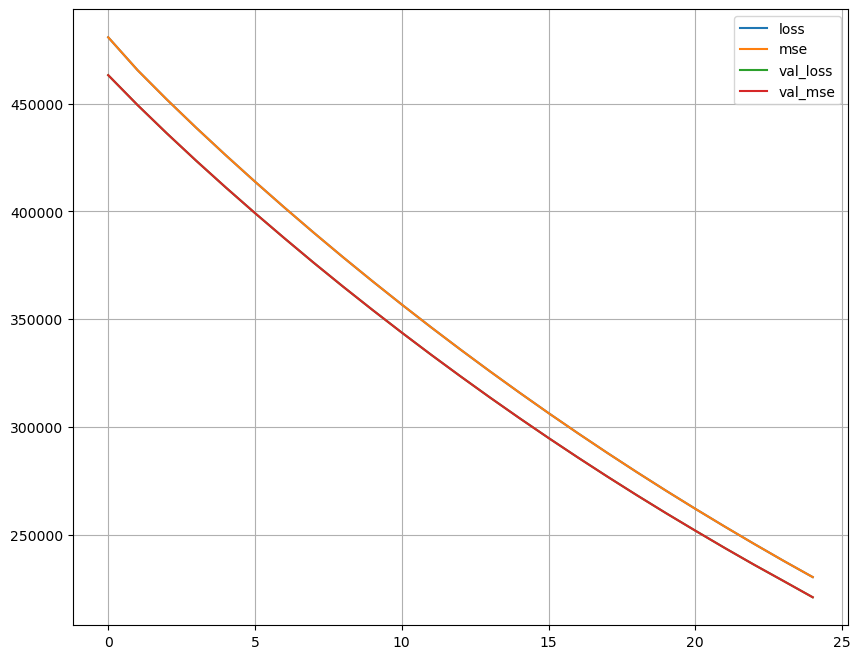

In [178]:
lstm2layers_xy = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=10,activation='linear')
])
lstm2layers_xy.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

history_lstm2layers_xy = lstm2layers_xy.fit(X_xytrain, y_xytrain, epochs=25, validation_data=(X_xyvalid, y_xyvalid))
pd.DataFrame(history_lstm2layers_xy.history).plot(figsize=(10,8))
plt.grid(True)

Epoch 1/25
219/219 [==============================] - 7s 24ms/step - loss: 1299.5936 - mse: 1299.5936 - val_loss: 772.6854 - val_mse: 772.6854
Epoch 2/25
219/219 [==============================] - 5s 22ms/step - loss: 560.9950 - mse: 560.9950 - val_loss: 443.1833 - val_mse: 443.1833
Epoch 3/25
219/219 [==============================] - 5s 22ms/step - loss: 345.7823 - mse: 345.7823 - val_loss: 259.3601 - val_mse: 259.3601
Epoch 4/25
219/219 [==============================] - 5s 22ms/step - loss: 185.5111 - mse: 185.5111 - val_loss: 135.6463 - val_mse: 135.6463
Epoch 5/25
219/219 [==============================] - 5s 22ms/step - loss: 95.4932 - mse: 95.4932 - val_loss: 69.8235 - val_mse: 69.8235
Epoch 6/25
219/219 [==============================] - 5s 22ms/step - loss: 52.1295 - mse: 52.1295 - val_loss: 41.1678 - val_mse: 41.1678
Epoch 7/25
219/219 [==============================] - 5s 22ms/step - loss: 29.5618 - mse: 29.5618 - val_loss: 23.0662 - val_mse: 23.0662
Epoch 8/25
219/219 [===

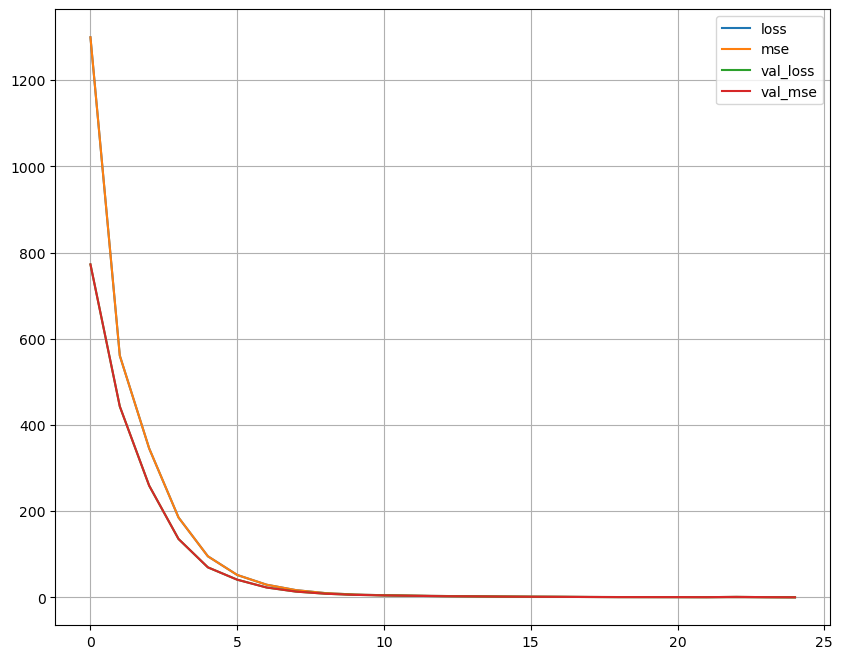

In [180]:
lstm1layers_x = keras.models.Sequential([
    keras.layers.LSTM(units=140, input_shape=[62,12]),
    keras.layers.Dense(units=5,activation='linear')
])
lstm1layers_x.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_lstm1layers_x = lstm1layers_x.fit(X_xtrain, y_xtrain, epochs=25, validation_data=(X_xvalid, y_xvalid))
pd.DataFrame(history_lstm1layers_x.history).plot(figsize=(10,8))
plt.grid(True)

Epoch 1/25
219/219 [==============================] - 7s 24ms/step - loss: 959969.8750 - mse: 959969.8750 - val_loss: 916684.5625 - val_mse: 916684.5625
Epoch 2/25
219/219 [==============================] - 5s 22ms/step - loss: 911986.5625 - mse: 911986.5625 - val_loss: 870911.4375 - val_mse: 870911.4375
Epoch 3/25
219/219 [==============================] - 5s 22ms/step - loss: 867356.4375 - mse: 867356.4375 - val_loss: 827908.2500 - val_mse: 827908.2500
Epoch 4/25
219/219 [==============================] - 5s 22ms/step - loss: 824964.8750 - mse: 824964.8750 - val_loss: 788004.3750 - val_mse: 788004.3750
Epoch 5/25
219/219 [==============================] - 5s 22ms/step - loss: 786008.8125 - mse: 786008.8125 - val_loss: 750648.8750 - val_mse: 750648.8750
Epoch 6/25
219/219 [==============================] - 5s 22ms/step - loss: 748787.0000 - mse: 748787.0000 - val_loss: 715099.8750 - val_mse: 715099.8750
Epoch 7/25
219/219 [==============================] - 5s 22ms/step - loss: 713658.

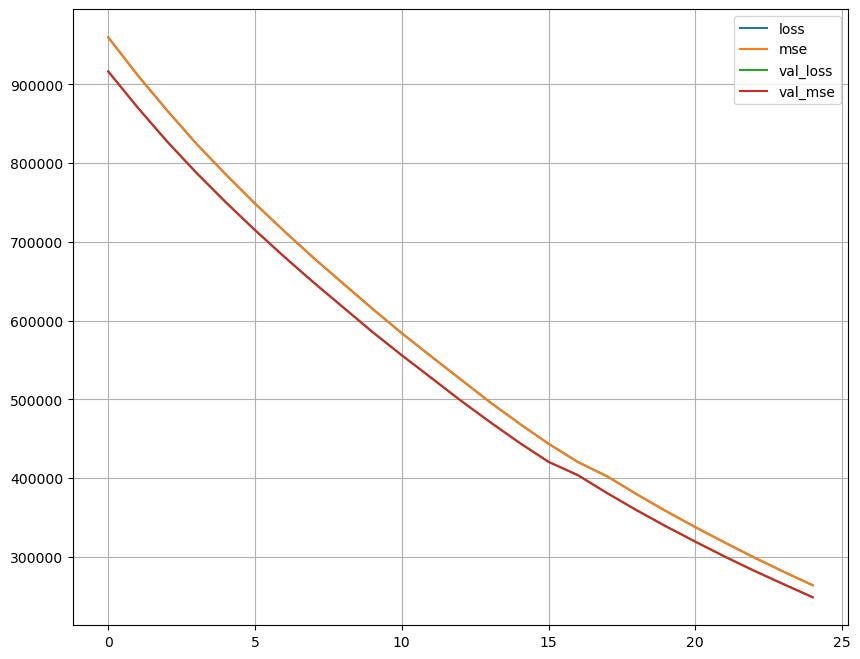

In [181]:
lstm1layers_y = keras.models.Sequential([
    keras.layers.LSTM(units=140, input_shape=[62,12]),
    keras.layers.Dense(units=5,activation='linear')
])
lstm1layers_y.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_lstm1layers_y = lstm1layers_y.fit(X_ytrain, y_ytrain, epochs=25, validation_data=(X_yvalid, y_yvalid))
pd.DataFrame(history_lstm1layers_y.history).plot(figsize=(10,8))
plt.grid(True)

Epoch 1/25
219/219 [==============================] - 6s 23ms/step - loss: 479638.1875 - mse: 479638.1875 - val_loss: 456704.4062 - val_mse: 456704.4062
Epoch 2/25
219/219 [==============================] - 5s 21ms/step - loss: 453319.3125 - mse: 453319.3125 - val_loss: 432120.2188 - val_mse: 432120.2188
Epoch 3/25
219/219 [==============================] - 5s 21ms/step - loss: 430102.5938 - mse: 430102.5938 - val_loss: 410533.9062 - val_mse: 410533.9062
Epoch 4/25
219/219 [==============================] - 5s 21ms/step - loss: 408874.6875 - mse: 408874.6875 - val_loss: 390374.2188 - val_mse: 390374.2188
Epoch 5/25
219/219 [==============================] - 5s 21ms/step - loss: 388977.6250 - mse: 388977.6250 - val_loss: 371160.8125 - val_mse: 371160.8125
Epoch 6/25
219/219 [==============================] - 5s 21ms/step - loss: 369913.4688 - mse: 369913.4688 - val_loss: 352925.3125 - val_mse: 352925.3125
Epoch 7/25
219/219 [==============================] - 5s 21ms/step - loss: 351628.

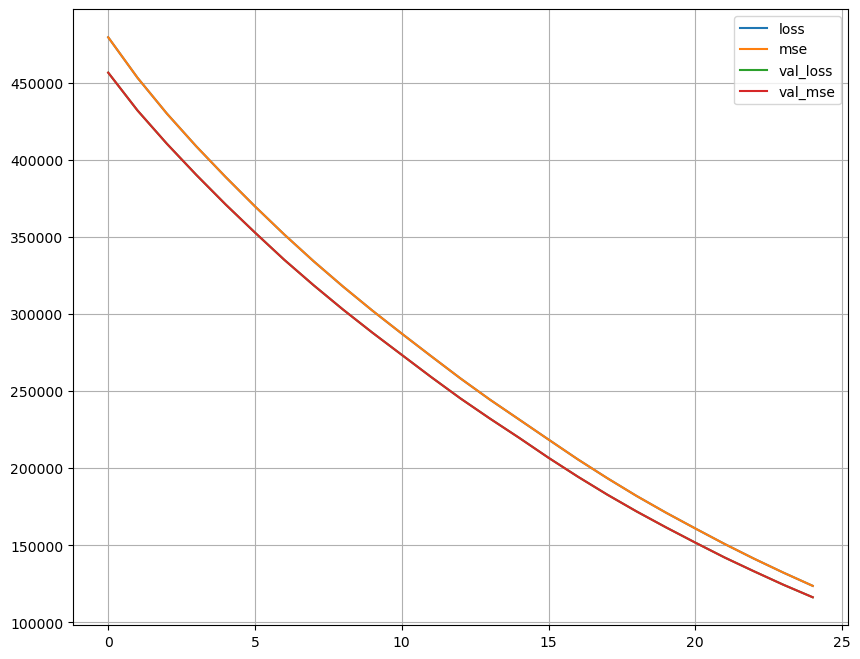

In [182]:
lstm1layers_xy = keras.models.Sequential([
    keras.layers.LSTM(units=140, input_shape=[62,12]),
    keras.layers.Dense(units=10,activation='linear')
])
lstm1layers_xy.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_lstm1layers_xy = lstm1layers_xy.fit(X_xytrain, y_xytrain, epochs=25, validation_data=(X_xyvalid, y_xyvalid))
pd.DataFrame(history_lstm1layers_xy.history).plot(figsize=(10,8))
plt.grid(True)

In [187]:
gru_x = keras.models.Sequential([
    keras.layers.GRU(units=140, input_shape=[62,12]),
    keras.layers.Dense(units=5,activation='linear')
])
gru_x.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_gru_x = gru_x.fit(X_xtrain, y_xtrain, epochs=25, validation_data=(X_xvalid, y_xvalid))

Epoch 1/25
219/219 [==============================] - 7s 27ms/step - loss: 1117.6378 - mse: 1117.6378 - val_loss: 617.0998 - val_mse: 617.0998
Epoch 2/25
219/219 [==============================] - 6s 26ms/step - loss: 440.2507 - mse: 440.2507 - val_loss: 325.8657 - val_mse: 325.8657
Epoch 3/25
219/219 [==============================] - 6s 26ms/step - loss: 239.3065 - mse: 239.3065 - val_loss: 175.0269 - val_mse: 175.0269
Epoch 4/25
219/219 [==============================] - 6s 26ms/step - loss: 121.8715 - mse: 121.8715 - val_loss: 87.1703 - val_mse: 87.1703
Epoch 5/25
219/219 [==============================] - 6s 25ms/step - loss: 59.3144 - mse: 59.3144 - val_loss: 42.2004 - val_mse: 42.2004
Epoch 6/25
219/219 [==============================] - 6s 25ms/step - loss: 27.3754 - mse: 27.3754 - val_loss: 19.4091 - val_mse: 19.4091
Epoch 7/25
219/219 [==============================] - 6s 25ms/step - loss: 14.3843 - mse: 14.3843 - val_loss: 11.2981 - val_mse: 11.2981
Epoch 8/25
219/219 [=====

In [190]:
gru_y = keras.models.Sequential([
    keras.layers.GRU(units=140, input_shape=[62,12]),
    keras.layers.Dense(units=5,activation='linear')
])
gru_y.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
gru_y_history = gru_y.fit(X_ytrain, y_ytrain, epochs=25, validation_data=(X_yvalid, y_yvalid))

Epoch 1/25
219/219 [==============================] - 7s 27ms/step - loss: 955066.0625 - mse: 955066.0625 - val_loss: 907940.6875 - val_mse: 907940.6875
Epoch 2/25
219/219 [==============================] - 6s 25ms/step - loss: 900511.9375 - mse: 900511.9375 - val_loss: 856934.2500 - val_mse: 856934.2500
Epoch 3/25
219/219 [==============================] - 6s 26ms/step - loss: 850866.2500 - mse: 850866.2500 - val_loss: 810230.0000 - val_mse: 810230.0000
Epoch 4/25
219/219 [==============================] - 6s 26ms/step - loss: 804659.6875 - mse: 804659.6875 - val_loss: 765902.4375 - val_mse: 765902.4375
Epoch 5/25
219/219 [==============================] - 6s 26ms/step - loss: 761410.4375 - mse: 761410.4375 - val_loss: 724720.9375 - val_mse: 724720.9375
Epoch 6/25
219/219 [==============================] - 6s 25ms/step - loss: 720331.1875 - mse: 720331.1875 - val_loss: 684942.7500 - val_mse: 684942.7500
Epoch 7/25
219/219 [==============================] - 6s 25ms/step - loss: 681207.

In [191]:
gru_xy = keras.models.Sequential([
    keras.layers.GRU(units=140, input_shape=[62,12]),
    keras.layers.Dense(units=10,activation='linear')
])
gru_xy.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
gru_xy_history = gru_xy.fit(X_xytrain, y_xytrain, epochs=25, validation_data=(X_xyvalid, y_xyvalid))

Epoch 1/25
219/219 [==============================] - 7s 27ms/step - loss: 477641.7500 - mse: 477641.7500 - val_loss: 453888.0000 - val_mse: 453888.0000
Epoch 2/25
219/219 [==============================] - 6s 25ms/step - loss: 450099.5938 - mse: 450099.5938 - val_loss: 428221.3438 - val_mse: 428221.3438
Epoch 3/25
219/219 [==============================] - 6s 25ms/step - loss: 424836.0000 - mse: 424836.0000 - val_loss: 404023.6250 - val_mse: 404023.6250
Epoch 4/25
219/219 [==============================] - 6s 25ms/step - loss: 401121.5625 - mse: 401121.5625 - val_loss: 381465.4688 - val_mse: 381465.4688
Epoch 5/25
219/219 [==============================] - 6s 25ms/step - loss: 378575.6562 - mse: 378575.6562 - val_loss: 359674.9062 - val_mse: 359674.9062
Epoch 6/25
219/219 [==============================] - 5s 25ms/step - loss: 357165.3125 - mse: 357165.3125 - val_loss: 339330.5312 - val_mse: 339330.5312
Epoch 7/25
219/219 [==============================] - 6s 25ms/step - loss: 337133.

### Comparison of different models

LSTM with 2 layers

In [194]:
rmse_single_model(model= lstm2layers_xy, X_test=X_xytest, y_test=y_xytest)

44/44 [==============================] - 1s 14ms/step
root mean squared error x: 20.750388831886195
root mean squared error y: 657.7376538666853
root mean squared error total: 465.32214644841804


In [196]:
rmse_double_model(model_x=lstm2layers_x, model_y=lstm2layers_y, Xx_test=X_xtest, yx_test=y_xtest, Xy_test=X_ytest, yy_test=y_ytest)

44/44 [==============================] - 1s 13ms/step
root mean squared error x: 2.5629670785297667
root mean squared error y: 657.3581949374699
root mean squared error total: 464.8259702575225


LSTM with 1 layer

In [195]:
rmse_single_model(model= lstm1layers_xy, X_test=X_xytest, y_test=y_xytest)

44/44 [==============================] - 0s 9ms/step
root mean squared error x: 19.480137857437807
root mean squared error y: 476.9076798775516
root mean squared error total: 337.5058598729317


In [197]:
rmse_double_model(model_x=lstm1layers_x, model_y=lstm1layers_y, Xx_test=X_xtest, yx_test=y_xtest, Xy_test=X_ytest, yy_test=y_ytest)

44/44 [==============================] - 0s 9ms/step
root mean squared error x: 0.6079012157300079
root mean squared error y: 493.70894243634416
root mean squared error total: 349.10520576575584


GRU

In [198]:
rmse_single_model(model= gru_xy, X_test=X_xytest, y_test=y_xytest)

44/44 [==============================] - 1s 11ms/step
root mean squared error x: 18.918734329034827
root mean squared error y: 441.16812736263773
root mean squared error total: 312.2396796607289


In [199]:
rmse_double_model(model_x=gru_x, model_y=gru_y, Xx_test=X_xtest, yx_test=y_xtest, Xy_test=X_ytest, yy_test=y_ytest)

44/44 [==============================] - 1s 11ms/step
root mean squared error x: 0.6425199350344132
root mean squared error y: 449.9009591206844
root mean squared error total: 318.128343479152


The results showed that the best performing model is the GRU model predicting x and y at the same time.
The analysis shows that all models result in higher RMSE when predicting y. This goes against what seen in the graphical analysis of data, in fact the y coordinate showed a linear increase through time.
To solve the problem a transformation is applied to the dataset and the models are trained again. The transformation consists in rescaling x and y by subtracting the starting x and y.

In [222]:
file = pd.read_csv("./training_data_new/"+file_list[0])
predict_steps = 5
time_steps = file.to_numpy().shape[0] - predict_steps
number_of_variables_s = file.to_numpy().shape[1] + 4
x_scaled_index = -2
y_scaled_index = -1

In [215]:
def create_dataset_train_scaled(list_of_files, time_steps, number_of_variables, prediction_steps, training_size=7000,
                         variable_index=0):
    X_train, y_train = np.zeros((training_size, time_steps, number_of_variables)), np.zeros(
        (training_size, prediction_steps))
    for i in range(training_size):
        file = pd.read_csv("./training_data_new/" + list_of_files[i])
        file["Starting_X"] = file.Local_X[0]
        file["Starting_Y"] = file.Local_Y[0]
        file['Local_Scaled_X'] = file['Local_X'] - file['Starting_X']
        file['Local_Scaled_Y'] = file['Local_Y'] - file['Starting_Y']
        X_train[i, :, :] = file.to_numpy()[:time_steps, :]
        y_train[i, :] = file.to_numpy()[-prediction_steps:, variable_index]
    return X_train, y_train

In [216]:
def create_dataset_train_xy_scaled(list_of_files, time_steps, number_of_variables, prediction_steps, training_size=7000):
    X_train, y_train = np.zeros((training_size, time_steps, number_of_variables)), np.zeros(
        (training_size, prediction_steps * 2))
    for i in range(training_size):
        file = pd.read_csv("./training_data_new/" + list_of_files[i])
        file["Starting_X"] = file.Local_X[0]
        file["Starting_Y"] = file.Local_Y[0]
        file['Local_Scaled_X'] = file['Local_X'] - file['Starting_X']
        file['Local_Scaled_Y'] = file['Local_Y'] - file['Starting_Y']
        X_train[i, :, :] = file.to_numpy()[:time_steps, :]
        y_train[i, :] = np.hstack((file.to_numpy()[-prediction_steps:, -2], file.to_numpy()[-prediction_steps:, -1]))
    return X_train, y_train

In [217]:

def create_dataset_valid_scaled(list_of_files, time_steps, number_of_variables, prediction_steps, valid_start=7000,
                         valid_size=1000, variable_index=0):
    X_train, y_train = np.zeros((valid_size, time_steps, number_of_variables)), np.zeros((valid_size, prediction_steps))
    for i in range(valid_size):
        file = pd.read_csv("./training_data_new/" + list_of_files[valid_start + i])
        file["Starting_X"] = file.Local_X[0]
        file["Starting_Y"] = file.Local_Y[0]
        file['Local_Scaled_X'] = file['Local_X'] - file['Starting_X']
        file['Local_Scaled_Y'] = file['Local_Y'] - file['Starting_Y']
        X_train[i, :, :] = file.to_numpy()[:time_steps, :]
        y_train[i, :] = file.to_numpy()[-prediction_steps:, variable_index]
    return X_train, y_train


In [218]:
def create_dataset_valid_xy_scaled(list_of_files, time_steps, number_of_variables, prediction_steps, valid_start=7000,
                            valid_size=1000):
    X_train, y_train = np.zeros((valid_size, time_steps, number_of_variables)), np.zeros(
        (valid_size, prediction_steps * 2))
    for i in range(valid_size):
        file = pd.read_csv("./training_data_new/" + list_of_files[valid_start + i])
        file["Starting_X"] = file.Local_X[0]
        file["Starting_Y"] = file.Local_Y[0]
        file['Local_Scaled_X'] = file['Local_X'] - file['Starting_X']
        file['Local_Scaled_Y'] = file['Local_Y'] - file['Starting_Y']
        X_train[i, :, :] = file.to_numpy()[:time_steps, :]
        y_train[i, :] = np.hstack((file.to_numpy()[-prediction_steps:, -2], file.to_numpy()[-prediction_steps:, -1]))
    return X_train, y_train

In [219]:
def create_dataset_test_scaled(list_of_files, time_steps, number_of_variables, prediction_steps, test_start=8000,
                        test_size=1400, variable_index=0):
    X_train, y_train = np.zeros((test_size, time_steps, number_of_variables)), np.zeros((test_size, prediction_steps))
    for i in range(test_size):
        file = pd.read_csv("./training_data_new/" + list_of_files[test_start + i])
        file["Starting_X"] = file.Local_X[0]
        file["Starting_Y"] = file.Local_Y[0]
        file['Local_Scaled_X'] = file['Local_X'] - file['Starting_X']
        file['Local_Scaled_Y'] = file['Local_Y'] - file['Starting_Y']
        X_train[i, :, :] = file.to_numpy()[:time_steps, :]
        y_train[i, :] = file.to_numpy()[-prediction_steps:, variable_index]
    return X_train, y_train

In [220]:
def create_dataset_test_xy_scaled(list_of_files, time_steps, number_of_variables, prediction_steps , test_start=8000, test_size=1400):
    X_train, y_train = np.zeros((test_size,time_steps,number_of_variables)), np.zeros((test_size,prediction_steps*2))
    for i in range(test_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[test_start+i])
        file["Starting_X"] = file.Local_X[0]
        file["Starting_Y"] = file.Local_Y[0]
        file['Local_Scaled_X'] = file['Local_X'] - file['Starting_X']
        file['Local_Scaled_Y'] = file['Local_Y'] - file['Starting_Y']
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = np.hstack((file.to_numpy()[-prediction_steps:,-2], file.to_numpy()[-prediction_steps:,-1]))
    return X_train, y_train

In [223]:
X_xtrain_s, y_xtrain_s = create_dataset_train_scaled(file_list, time_steps=time_steps, number_of_variables=number_of_variables_s,
                                          prediction_steps=predict_steps, variable_index=x_scaled_index)
X_xvalid_s, y_xvalid_s = create_dataset_valid(file_list, time_steps=time_steps, number_of_variables=number_of_variables_s,
                                          prediction_steps=predict_steps, variable_index=x_scaled_index)
X_xtest_s, y_xtest_s = create_dataset_test(file_list, time_steps=time_steps, number_of_variables=number_of_variables_s,
                                       prediction_steps=predict_steps, variable_index=x_scaled_index)

In [228]:
X_ytrain_s, y_ytrain_s = create_dataset_train_scaled(file_list, time_steps=time_steps, number_of_variables=number_of_variables_s,
                                          prediction_steps=predict_steps, variable_index=y_scaled_index)
X_yvalid_s, y_yvalid_s = create_dataset_valid_scaled(file_list, time_steps=time_steps, number_of_variables=number_of_variables,
                                          prediction_steps=predict_steps, variable_index=y_scaled_index)
X_ytest_s, y_ytest_s = create_dataset_test_scaled(file_list, time_steps=time_steps, number_of_variables=number_of_variables,
                                       prediction_steps=predict_steps, variable_index=y_scaled_index)

In [242]:

X_xytrain_s, y_xytrain_s = create_dataset_train_xy_scaled(file_list, time_steps=time_steps,
                                               number_of_variables=number_of_variables, prediction_steps=predict_steps)
X_xyvalid_s, y_xyvalid_s = create_dataset_valid_xy_scaled(file_list, time_steps=time_steps,
                                               number_of_variables=number_of_variables, prediction_steps=predict_steps)
X_xytest_s, y_xytest_s = create_dataset_test_xy_scaled(file_list, time_steps=time_steps, number_of_variables=number_of_variables,
                                            prediction_steps=predict_steps)

Epoch 1/25
219/219 [==============================] - 11s 42ms/step - loss: 6.7900 - mse: 6.7900 - val_loss: 5.0925 - val_mse: 5.0925
Epoch 2/25
219/219 [==============================] - 8s 39ms/step - loss: 6.4544 - mse: 6.4544 - val_loss: 5.2776 - val_mse: 5.2776
Epoch 3/25
219/219 [==============================] - 8s 39ms/step - loss: 5.7270 - mse: 5.7270 - val_loss: 3.8604 - val_mse: 3.8604
Epoch 4/25
219/219 [==============================] - 8s 38ms/step - loss: 3.4614 - mse: 3.4614 - val_loss: 2.9004 - val_mse: 2.9004
Epoch 5/25
219/219 [==============================] - 8s 38ms/step - loss: 2.0458 - mse: 2.0458 - val_loss: 1.2682 - val_mse: 1.2682
Epoch 6/25
219/219 [==============================] - 8s 38ms/step - loss: 1.7091 - mse: 1.7091 - val_loss: 2.1540 - val_mse: 2.1540
Epoch 7/25
219/219 [==============================] - 8s 38ms/step - loss: 1.3742 - mse: 1.3742 - val_loss: 1.1730 - val_mse: 1.1730
Epoch 8/25
219/219 [==============================] - 8s 38ms/step -

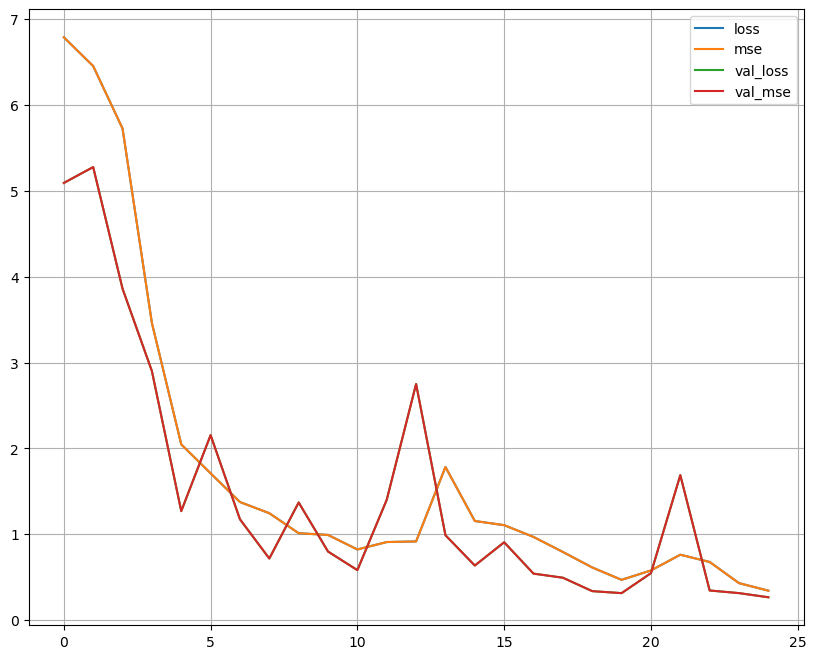

In [230]:
lstm2layers_x_s = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,16], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
lstm2layers_x_s.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_lstm2layers_x_s = lstm2layers_x_s.fit(X_xtrain_s, y_xtrain_s, epochs=25, validation_data=(X_xvalid_s, y_xvalid_s))
pd.DataFrame(history_lstm2layers_x_s.history).plot(figsize=(10,8))
plt.grid(True)

Epoch 1/25
219/219 [==============================] - 12s 43ms/step - loss: 27761.7812 - mse: 27761.7812 - val_loss: 24049.0000 - val_mse: 24049.0000
Epoch 2/25
219/219 [==============================] - 9s 41ms/step - loss: 23385.0996 - mse: 23385.0996 - val_loss: 20426.2285 - val_mse: 20426.2285
Epoch 3/25
219/219 [==============================] - 9s 41ms/step - loss: 19977.6621 - mse: 19977.6621 - val_loss: 17413.4961 - val_mse: 17413.4961
Epoch 4/25
219/219 [==============================] - 9s 41ms/step - loss: 17103.2344 - mse: 17103.2344 - val_loss: 14886.7344 - val_mse: 14886.7344
Epoch 5/25
219/219 [==============================] - 9s 41ms/step - loss: 14761.9033 - mse: 14761.9033 - val_loss: 12874.9473 - val_mse: 12874.9473
Epoch 6/25
219/219 [==============================] - 9s 41ms/step - loss: 12852.3047 - mse: 12852.3047 - val_loss: 11263.9092 - val_mse: 11263.9092
Epoch 7/25
219/219 [==============================] - 9s 41ms/step - loss: 11324.2090 - mse: 11324.2090 -

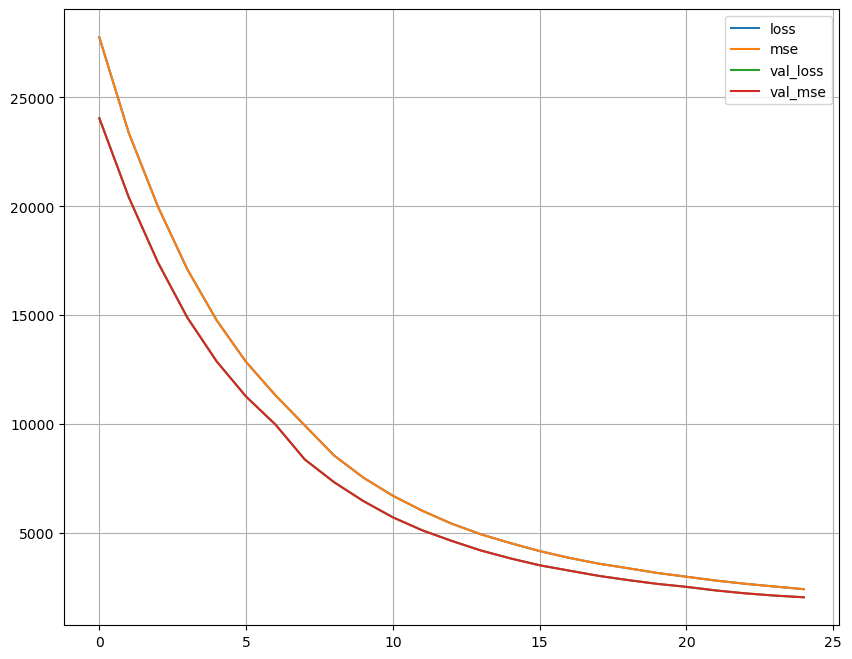

In [244]:
lstm2layers_y_s = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,16], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
lstm2layers_y_s.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_lstm2layers_y_s = lstm2layers_y_s.fit(X_ytrain_s, y_ytrain_s, epochs=25, validation_data=(X_yvalid_s, y_yvalid_s))
pd.DataFrame(history_lstm2layers_y_s.history).plot(figsize=(10,8))
plt.grid(True)

Epoch 1/25
219/219 [==============================] - 11s 42ms/step - loss: 13956.0342 - mse: 13956.0342 - val_loss: 12096.1074 - val_mse: 12096.1074
Epoch 2/25
219/219 [==============================] - 9s 39ms/step - loss: 11765.1650 - mse: 11765.1650 - val_loss: 10280.9365 - val_mse: 10280.9365
Epoch 3/25
219/219 [==============================] - 9s 39ms/step - loss: 10062.4814 - mse: 10062.4814 - val_loss: 8802.7002 - val_mse: 8802.7002
Epoch 4/25
219/219 [==============================] - 9s 39ms/step - loss: 8659.2236 - mse: 8659.2236 - val_loss: 7590.7900 - val_mse: 7590.7900
Epoch 5/25
219/219 [==============================] - 9s 39ms/step - loss: 7496.4688 - mse: 7496.4688 - val_loss: 6541.1724 - val_mse: 6541.1724
Epoch 6/25
219/219 [==============================] - 9s 39ms/step - loss: 6511.9502 - mse: 6511.9502 - val_loss: 5717.5293 - val_mse: 5717.5293
Epoch 7/25
219/219 [==============================] - 9s 39ms/step - loss: 5830.0664 - mse: 5830.0664 - val_loss: 5144.

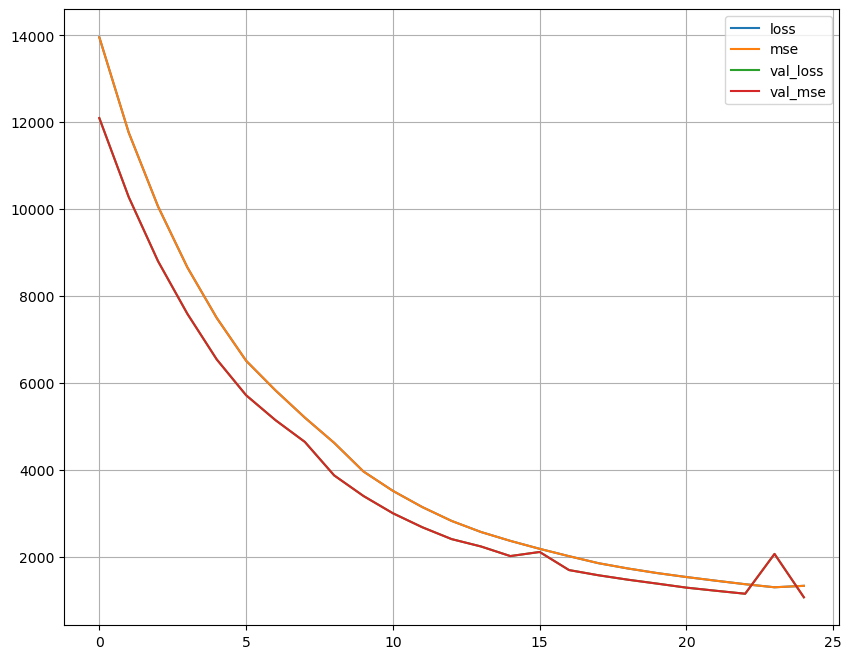

In [245]:
lstm2layers_xy_s = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,16], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=10,activation='linear')
])
lstm2layers_xy_s.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_lstm2layers_xy_s = lstm2layers_xy_s.fit(X_xytrain_s, y_xytrain_s, epochs=25, validation_data=(X_xyvalid_s, y_xyvalid_s))
pd.DataFrame(history_lstm2layers_xy_s.history).plot(figsize=(10,8))
plt.grid(True)

Epoch 1/25
219/219 [==============================] - 6s 24ms/step - loss: 6.9375 - mse: 6.9375 - val_loss: 5.5110 - val_mse: 5.5110
Epoch 2/25
219/219 [==============================] - 5s 22ms/step - loss: 6.5679 - mse: 6.5679 - val_loss: 5.1899 - val_mse: 5.1899
Epoch 3/25
219/219 [==============================] - 5s 22ms/step - loss: 5.7047 - mse: 5.7047 - val_loss: 4.0134 - val_mse: 4.0134
Epoch 4/25
219/219 [==============================] - 5s 22ms/step - loss: 4.0671 - mse: 4.0671 - val_loss: 2.3056 - val_mse: 2.3056
Epoch 5/25
219/219 [==============================] - 5s 22ms/step - loss: 2.5506 - mse: 2.5506 - val_loss: 1.5119 - val_mse: 1.5119
Epoch 6/25
219/219 [==============================] - 5s 22ms/step - loss: 1.7967 - mse: 1.7967 - val_loss: 1.1421 - val_mse: 1.1421
Epoch 7/25
219/219 [==============================] - 5s 22ms/step - loss: 1.3313 - mse: 1.3313 - val_loss: 0.8160 - val_mse: 0.8160
Epoch 8/25
219/219 [==============================] - 5s 22ms/step - 

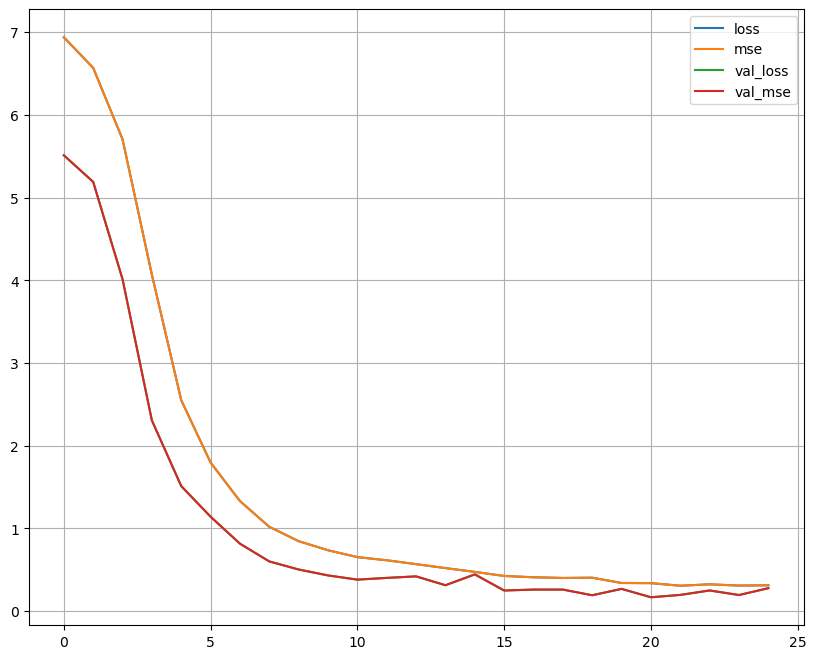

In [246]:
lstm1layers_x_s = keras.models.Sequential([
    keras.layers.LSTM(units=140, input_shape=[62,16]),
    keras.layers.Dense(units=5,activation='linear')
])
lstm1layers_x_s.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_lstm1layers_x_s = lstm1layers_x_s.fit(X_xtrain_s, y_xtrain_s, epochs=25, validation_data=(X_xvalid_s, y_xvalid_s))
pd.DataFrame(history_lstm1layers_x_s.history).plot(figsize=(10,8))
plt.grid(True)

Epoch 1/25
219/219 [==============================] - 7s 24ms/step - loss: 27795.6406 - mse: 27795.6406 - val_loss: 23273.6230 - val_mse: 23273.6230
Epoch 2/25
219/219 [==============================] - 5s 22ms/step - loss: 21882.4160 - mse: 21882.4160 - val_loss: 18413.1426 - val_mse: 18413.1426
Epoch 3/25
219/219 [==============================] - 5s 22ms/step - loss: 17596.8281 - mse: 17596.8281 - val_loss: 14909.1992 - val_mse: 14909.1992
Epoch 4/25
219/219 [==============================] - 5s 22ms/step - loss: 14410.9883 - mse: 14410.9883 - val_loss: 12264.4688 - val_mse: 12264.4688
Epoch 5/25
219/219 [==============================] - 5s 22ms/step - loss: 11953.7881 - mse: 11953.7881 - val_loss: 10234.9512 - val_mse: 10234.9512
Epoch 6/25
219/219 [==============================] - 5s 22ms/step - loss: 10107.9355 - mse: 10107.9355 - val_loss: 8697.8457 - val_mse: 8697.8457
Epoch 7/25
219/219 [==============================] - 5s 22ms/step - loss: 8656.8926 - mse: 8656.8926 - val_

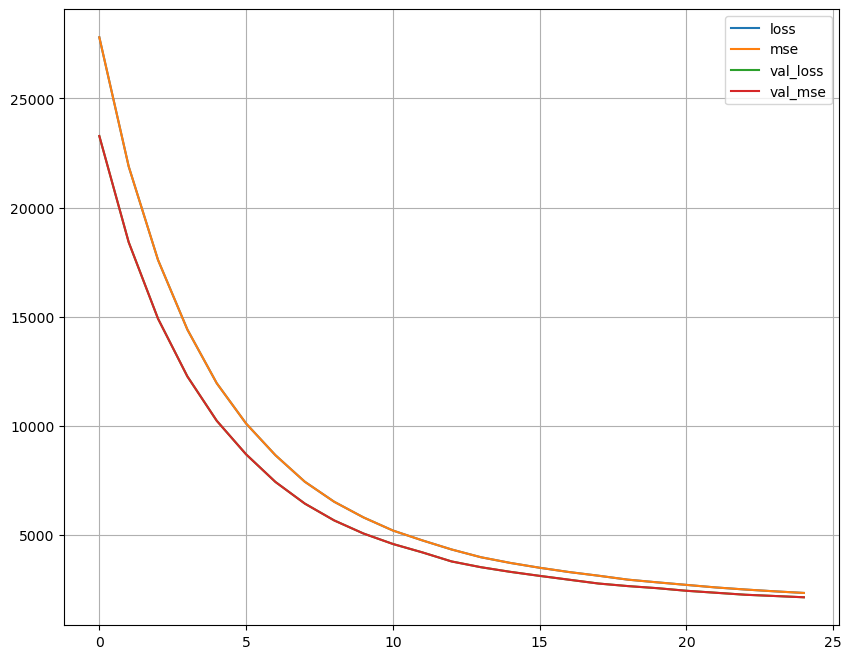

In [247]:
lstm1layers_y_s = keras.models.Sequential([
    keras.layers.LSTM(units=140, input_shape=[62,16]),
    keras.layers.Dense(units=5,activation='linear')
])
lstm1layers_y_s.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_lstm1layers_y_s = lstm1layers_y_s.fit(X_ytrain_s, y_ytrain_s, epochs=25, validation_data=(X_yvalid_s, y_yvalid_s))
pd.DataFrame(history_lstm1layers_y_s.history).plot(figsize=(10,8))
plt.grid(True)

Epoch 1/25
219/219 [==============================] - 6s 24ms/step - loss: 13918.8848 - mse: 13918.8848 - val_loss: 11735.6484 - val_mse: 11735.6484
Epoch 2/25
219/219 [==============================] - 5s 22ms/step - loss: 11132.6826 - mse: 11132.6826 - val_loss: 9374.0020 - val_mse: 9374.0020
Epoch 3/25
219/219 [==============================] - 5s 22ms/step - loss: 8899.6152 - mse: 8899.6152 - val_loss: 7525.4282 - val_mse: 7525.4282
Epoch 4/25
219/219 [==============================] - 5s 22ms/step - loss: 7220.0576 - mse: 7220.0576 - val_loss: 6120.0898 - val_mse: 6120.0898
Epoch 5/25
219/219 [==============================] - 5s 22ms/step - loss: 5949.6367 - mse: 5949.6367 - val_loss: 5105.1787 - val_mse: 5105.1787
Epoch 6/25
219/219 [==============================] - 5s 22ms/step - loss: 5017.5737 - mse: 5017.5737 - val_loss: 4344.6680 - val_mse: 4344.6680
Epoch 7/25
219/219 [==============================] - 5s 22ms/step - loss: 4337.2451 - mse: 4337.2451 - val_loss: 3818.7705 

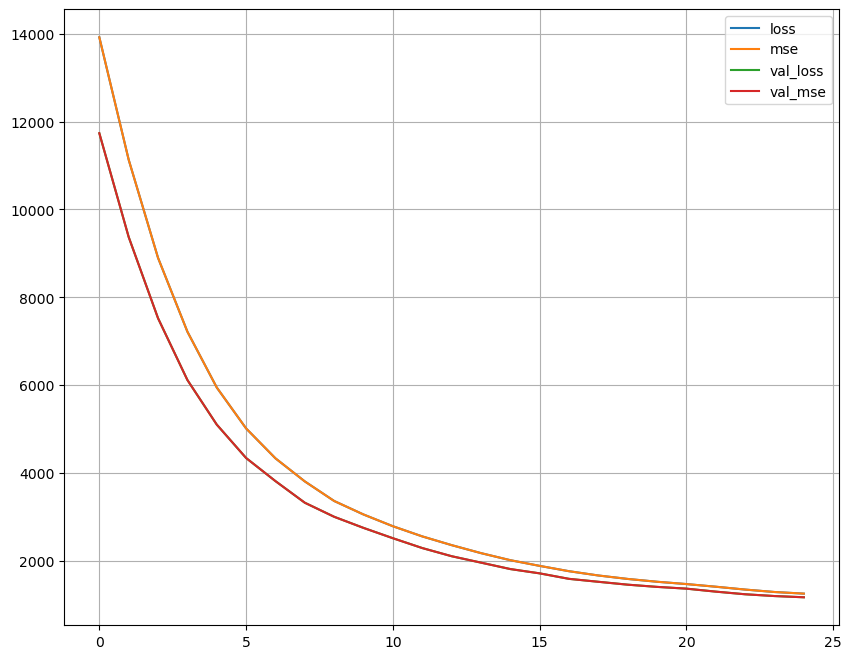

In [248]:
lstm1layers_xy_s = keras.models.Sequential([
    keras.layers.LSTM(units=140, input_shape=[62,16]),
    keras.layers.Dense(units=10,activation='linear')
])
lstm1layers_xy_s.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_lstm1layers_xy_s = lstm1layers_xy_s.fit(X_xytrain_s, y_xytrain_s, epochs=25, validation_data=(X_xyvalid_s, y_xyvalid_s))
pd.DataFrame(history_lstm1layers_xy_s.history).plot(figsize=(10,8))
plt.grid(True)

In [250]:
gru_x_s = keras.models.Sequential([
    keras.layers.GRU(units=140, input_shape=[62,16]),
    keras.layers.Dense(units=5,activation='linear')
])
gru_x_s.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_gru_x_s = gru_x_s.fit(X_xtrain_s, y_xtrain_s, epochs=25, validation_data=(X_xvalid_s, y_xvalid_s))

Epoch 1/25
219/219 [==============================] - 7s 27ms/step - loss: 6.9459 - mse: 6.9459 - val_loss: 5.4566 - val_mse: 5.4566
Epoch 2/25
219/219 [==============================] - 6s 25ms/step - loss: 6.7079 - mse: 6.7079 - val_loss: 5.4631 - val_mse: 5.4631
Epoch 3/25
219/219 [==============================] - 6s 25ms/step - loss: 6.4105 - mse: 6.4105 - val_loss: 5.1644 - val_mse: 5.1644
Epoch 4/25
219/219 [==============================] - 6s 25ms/step - loss: 5.8266 - mse: 5.8266 - val_loss: 4.4256 - val_mse: 4.4256
Epoch 5/25
219/219 [==============================] - 6s 26ms/step - loss: 4.9653 - mse: 4.9653 - val_loss: 3.5394 - val_mse: 3.5394
Epoch 6/25
219/219 [==============================] - 6s 25ms/step - loss: 3.7711 - mse: 3.7711 - val_loss: 2.3308 - val_mse: 2.3308
Epoch 7/25
219/219 [==============================] - 6s 25ms/step - loss: 2.3565 - mse: 2.3565 - val_loss: 1.6792 - val_mse: 1.6792
Epoch 8/25
219/219 [==============================] - 6s 25ms/step - 

In [251]:
gru_y_s = keras.models.Sequential([
    keras.layers.GRU(units=140, input_shape=[62,16]),
    keras.layers.Dense(units=5,activation='linear')
])
gru_y_s.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_gru_y_s = gru_y_s.fit(X_ytrain_s, y_ytrain_s, epochs=25, validation_data=(X_yvalid_s, y_yvalid_s))

Epoch 1/25
219/219 [==============================] - 9s 28ms/step - loss: 26433.8281 - mse: 26433.8281 - val_loss: 21086.2070 - val_mse: 21086.2070
Epoch 2/25
219/219 [==============================] - 6s 26ms/step - loss: 19297.9219 - mse: 19297.9219 - val_loss: 15711.6533 - val_mse: 15711.6533
Epoch 3/25
219/219 [==============================] - 6s 26ms/step - loss: 14659.4971 - mse: 14659.4971 - val_loss: 12114.1309 - val_mse: 12114.1309
Epoch 4/25
219/219 [==============================] - 6s 25ms/step - loss: 11469.6172 - mse: 11469.6172 - val_loss: 9463.7324 - val_mse: 9463.7324
Epoch 5/25
219/219 [==============================] - 6s 25ms/step - loss: 9091.8799 - mse: 9091.8799 - val_loss: 7781.7896 - val_mse: 7781.7896
Epoch 6/25
219/219 [==============================] - 6s 25ms/step - loss: 7585.3525 - mse: 7585.3525 - val_loss: 6583.7290 - val_mse: 6583.7290
Epoch 7/25
219/219 [==============================] - 6s 25ms/step - loss: 6576.0557 - mse: 6576.0557 - val_loss: 58

In [252]:
gru_xy_s = keras.models.Sequential([
    keras.layers.GRU(units=140, input_shape=[62,16]),
    keras.layers.Dense(units=10,activation='linear')
])
gru_xy_s.compile(optimizer='adam', loss = 'mse', metrics=['mse'])
history_gru_xy_s = gru_xy_s.fit(X_xytrain_s, y_xytrain_s, epochs=25, validation_data=(X_xyvalid_s, y_xyvalid_s))

Epoch 1/25
219/219 [==============================] - 7s 27ms/step - loss: 13410.0059 - mse: 13410.0059 - val_loss: 10752.8193 - val_mse: 10752.8193
Epoch 2/25
219/219 [==============================] - 6s 26ms/step - loss: 9878.4570 - mse: 9878.4570 - val_loss: 8090.9346 - val_mse: 8090.9346
Epoch 3/25
219/219 [==============================] - 6s 25ms/step - loss: 7568.0542 - mse: 7568.0542 - val_loss: 6270.3081 - val_mse: 6270.3081
Epoch 4/25
219/219 [==============================] - 6s 26ms/step - loss: 5954.8467 - mse: 5954.8467 - val_loss: 4984.0200 - val_mse: 4984.0200
Epoch 5/25
219/219 [==============================] - 6s 26ms/step - loss: 4812.2549 - mse: 4812.2549 - val_loss: 4127.6001 - val_mse: 4127.6001
Epoch 6/25
219/219 [==============================] - 6s 26ms/step - loss: 4069.8394 - mse: 4069.8394 - val_loss: 3541.8826 - val_mse: 3541.8826
Epoch 7/25
219/219 [==============================] - 6s 25ms/step - loss: 3524.0115 - mse: 3524.0115 - val_loss: 3125.2407 - 

### Comparison of models

LSTM with 2 layers

In [269]:
rmse_single_model(model=lstm2layers_xy_s, X_test=X_xytest_s, y_test=y_xytest_s)

44/44 [==============================] - 1s 15ms/step
root mean squared error x: 2.5796417918291796
root mean squared error y: 33.45542900796922
root mean squared error total: 23.726781091010007


In [261]:
rmse_double_model(model_x=lstm2layers_x_s, model_y=lstm2layers_y_s, Xx_test=X_xtest_s, yx_test=y_xtest_s, Xy_test=X_ytest_s,
                  yy_test=y_ytest_s)

44/44 [==============================] - 1s 15ms/step
root mean squared error x: 0.4936102573776928
root mean squared error y: 32.737028203249565
root mean squared error total: 23.151205872119768


LSTM with 1 layer

In [268]:
rmse_single_model(model=lstm1layers_xy_s, X_test=X_xytest_s, y_test=y_xytest_s)

44/44 [==============================] - 0s 10ms/step
root mean squared error x: 1.496802332612766
root mean squared error y: 28.859057398571274
root mean squared error total: 20.433864186161003


In [263]:
rmse_double_model(model_x=lstm1layers_x_s, model_y=lstm1layers_y_s, Xx_test=X_xtest_s, yx_test=y_xtest_s, Xy_test=X_ytest_s,
                  yy_test=y_ytest_s)

44/44 [==============================] - 1s 10ms/step
root mean squared error x: 0.4869431811090447
root mean squared error y: 27.33038798670024
root mean squared error total: 19.3285698017882


GRU

In [267]:
rmse_single_model(model=gru_xy_s, X_test=X_xytest_s, y_test=y_xytest_s)

44/44 [==============================] - 1s 11ms/step
root mean squared error x: 2.500724226971456
root mean squared error y: 27.154133402319665
root mean squared error total: 19.282123618656925


In [265]:
rmse_double_model(model_x=gru_x_s, model_y=gru_y_s, Xx_test=X_xtest_s, yx_test=y_xtest_s, Xy_test=X_ytest_s, yy_test=y_ytest_s)

44/44 [==============================] - 1s 11ms/step
root mean squared error x: 0.5024931665025735
root mean squared error y: 26.745961568244176
root mean squared error total: 18.915588275181616


### Conclusion

The best model found in this analysis was a GRU model with separate models for predicting x and y.
To select the best model the steps below were taken:
- Split the dataset in train, test and validation set
- Consider 3 different types of models (LSTM with 1 layer, LSTM with 2 layers or GRU) and apply them to predict the (x,y) coordinates (both separately and simultaneously)
- Train the models with same optimizer and number of epochs
- Compare the models' performance
- Apply a transformation, subtracting the starting x and y coordinates for each file
- Compare the models' performance and select the best

All the models were trained with all variables (there was not a significant improvement when variable selection was conducted), with 25 epochs and the optimizer selected was the Adam.
Scaling the coordinates had a significant impact on the predictive power of every model trained.
The final model obtained a RMSE on the test set of 18.92.
#### Gated Recurrent Unit

The Gated Recurrent Unit is a type of recurrent neural network architecture. It is similar to LSTM and was proposed by [Kyunghyun Cho et al.](https://arxiv.org/pdf/1406.1078v3.pdf) in a 2014 paper.
The GRU cell can be described as a simplified version of the LSTM cell. The main simplification are:
- $c_{(t)}$ and $h_{(t)}$ are merged into the $h_{(t)}$ vector
- forget gate and input gate are controlled by a single gate controller $z_t$
- there is no output gate, from the schema it is possible to see that the unit output is only $h_{(t)}$
- there is a new gate controller $r_{(t)}$ that determine which information of $h_{(t-1)}$ will be input of the main layer

Refer to [GRU schema](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*6eNTqLzQ08AABo-STFNiBw.png)
This model has less parameters than a comparable LSTM model (as shown below) but can still obtain the same, if not better, results.

In [278]:
gru_y_s.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 140)               66360     
                                                                 
 dense_48 (Dense)            (None, 5)                 705       
                                                                 
Total params: 67,065
Trainable params: 67,065
Non-trainable params: 0
_________________________________________________________________


In [277]:
lstm1layers_x_s.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_55 (LSTM)              (None, 140)               87920     
                                                                 
 dense_43 (Dense)            (None, 5)                 705       
                                                                 
Total params: 88,625
Trainable params: 88,625
Non-trainable params: 0
_________________________________________________________________
